# ART-Reproduce-Main01
## 1. Preps
### 1.1 Imports

In [1]:
from __future__ import division
import math
from math import *
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano
import warnings
from numpy.random import binomial, randn, uniform
from sklearn.model_selection import train_test_split

from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from hpd import *


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda2\envs\rdkit-env-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### 1.2 Other Stuff

In [2]:
# %matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
import sys
print("%s/%s" %(sys._getframe().f_code.co_filename, sys._getframe().f_code.co_name))

<ipython-input-2-b9eb80f85e32>/<module>


## 2. Create Synthetic Data

### 2.1

In [3]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Inputs to be changed
x_dimension=10 #<<<<<
x_mean, x_std, n_data = 5, 5, 50 #<<<<<
sd_test_y_noise = 0.2 #<<<<<
#Function_test="easy"
Function_test="medium"
#Function_test="dffclt"

#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
#----------------------------------------#
# Basic parameters
#x_dimension=5 #<<<<<
#test_x_vec=np.array([1,2,3])
n_predictors=x_dimension
#----------------------------------------#
def F_easy(x_vec):
    dms=len(x_vec) # dms : dimension
    return 0 - ( np.linalg.norm(x_vec-np.ones(dms)*5) )**2 / dms + math.exp( 0-(np.linalg.norm(x_vec))**2 ) + 25

def F_medium(x_vec):
    dms=len(x_vec) # dms : dimension
    return  (np.linalg.norm(x_vec,4))**4 / dms - 16 * (np.linalg.norm(x_vec))**2 / dms + 5 * np.sum(x_vec) / dms

def F_dffclt(x_vec):
    dms=len(x_vec)
    return np.sum( [ (x_i**(1/2))*math.sin(x_i) for x_i in list(x_vec) ] )

#----------------------------------------#
if Function_test=="dffclt":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_dffclt(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )

if Function_test=="medium":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_medium(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )
    
if Function_test=="easy":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_easy(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )

norm.rvs generated x_test_np_array: 
 [[-0.66382396  1.76259595 -3.999085   -1.58133942 -2.82595287 -3.26129124
  -2.50991831 -1.23551418 -0.82586021  0.31053387]
 [-0.64644388  1.481756   -2.364382    3.02493949 -3.78089925  1.36374008
  -0.66156158  0.46951863 -2.87690449 -2.41518809]
 [ 2.40595655  3.74609261 -1.49260657  1.53858093  3.01111322  3.15685331
  -3.31964631 -3.68756173 -2.64135664  3.02514003]
 [-3.21322533 -0.631139    3.66311624  0.26532228  1.53501691 -1.47587495
   1.49200742  2.67700538 -3.85369378  2.00115452]
 [ 3.91088871  1.98532524 -1.75644806  2.31423463 -3.17419195 -0.41685179
   3.26876402 -1.65108681 -1.69779729 -2.95977142]] 
 (50, 10) 
......


dataframe x_test_df: 
          X0        X1        X2        X3        X4        X5        X6  \
0 -0.663824  1.762596 -3.999085 -1.581339 -2.825953 -3.261291 -2.509918   
1 -0.646444  1.481756 -2.364382  3.024939 -3.780899  1.363740 -0.661562   
2  2.405957  3.746093 -1.492607  1.538581  3.011113  3.156853 -3.31

### 2.2  Prepare for level 0 learning

In [4]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
K_CV=5 #<<<<<
train_cv_dataset_list_x=[[] for i in range(K_CV)]
train_cv_dataset_list_y=[[] for i in range(K_CV)]
def get_train_cv_index(K_CV, n_data):
    dataset_len=int(n_data/K_CV)
    index_list=[[] for i in range(K_CV)]
    for i in range(K_CV):
        index_list[i]= list(range(n_data)[i*dataset_len:i*dataset_len+dataset_len])
    index_list[-1] = list(index_list[-1]) + list(range(n_data)[dataset_len*K_CV:])
    return index_list
index_list = get_train_cv_index(K_CV, n_data)


#----------------------------------------#
for i in range(K_CV):
    for j in range(n_data):
        if j not in index_list[i]:
            train_cv_dataset_list_x[i].append(x_test_np_array[j])
            train_cv_dataset_list_y[i].append(y_test_np_array[j])
    train_cv_dataset_list_x[i]=np.array(train_cv_dataset_list_x[i])
    train_cv_dataset_list_y[i]=np.array(train_cv_dataset_list_y[i])
#print(train_cv_dataset_list_y)

#----------------------------------------#
print(index_list)
print(train_cv_dataset_list_y)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
[array([-23.24037173, -49.40346462, -41.03783119, -30.65712134,
       -47.96750733, -37.56947107, -30.94169241, -24.43407509,
       -40.57971791, -39.35234151, -17.24434342, -40.58214477,
       -43.10452157, -19.52389202, -34.01764704, -16.28668924,
       -28.7117195 , -24.84921912, -35.42004103, -30.52803295,
       -33.99106401, -49.15279918, -26.06947609, -40.34388925,
       -39.01529661, -30.91663067, -24.45924275, -42.26668461,
       -28.07688643, -31.27648663, -36.1771179 , -34.86356179,
       -46.46230567, -28.57011923, -36.12867853, -36.27879379,
       -43.20072844, -26.08902887, -23.73337165, -33.61699404]), array([-37.14017605, -37.42549404, -45.89850959, -31.06630395,
       -41.55535216, -34.76209909, -22.63851153, -46.8283905 ,
       -26.67480077, -25.45090459, -17.2

### 2.3 Model Configuration 

In [5]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data

#--------------------------------------------------------------------------------#
# Prep for ML model training
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","TPOT"]

#----------------------------------------#
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()

#----------------------------------------#
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=1)

#----------------------------------------#
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor(solver='lbfgs', alpha=10, hidden_layer_sizes=(10, 4), max_iter=200, random_state=1)

#----------------------------------------#
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
steps = [		('scaler',StandardScaler()),
        		('svr',SVR())]
pipeline =Pipeline(steps)

#for grid search
c_gs =[10,100,1000,10000]
g_gs = [1e-2,1e-1,1e0]
#for random search
c_rs = np.linspace(10, 10000, num=40, endpoint=True)
g_rs = np.linspace(1e-2, 1e0, num=30, endpoint=True)
#set of parameters for grid search
parameters_gs = {'svr__C':c_gs, 'svr__gamma':g_gs, 'svr__kernel': ['rbf', 'poly']}
#set of parameters for random search
parameters_rs = {'svr__C':c_rs, 'svr__gamma':g_rs, 'svr__kernel': ['rbf', 'poly']}

from sklearn.metrics import SCORERS
#cvo = GridSearchCV(pipeline, parameters_gs, cv=7, scoring=None)
cvo = RandomizedSearchCV(pipeline, parameters_rs, cv=5, scoring=None, n_iter=50, random_state=1)

print("Start Grid Search")
#cvo.fit(x_test_np_array, y_test_np_array)
#best_C, best_kernel, best_gamma = cvo.best_params_['svr__C'], cvo.best_params_['svr__kernel'], cvo.best_params_['svr__gamma']
best_C, best_kernel, best_gamma = 522.3076923076923, "rbf", 0.01
print(best_C, best_kernel, best_gamma)
print("End Grid Search")

#SVM = SVR(C=best_C, kernel=best_kernel, gamma=best_gamma, epsilon=0.2)
SVM = SVR(C=1, kernel='poly', gamma='scale', epsilon=0.2)

#----------------------------------------#
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=1.0, kernel='poly')

#----------------------------------------#
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)

#----------------------------------------#
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel, RBF
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic, ExpSineSquared, DotProduct
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0, length_scale_bounds=(0.1, 10.0),periodicity_bounds=(1.0, 10.0)), 
           ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5),
           1.0 * DotProduct() + WhiteKernel(),
           1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1)]

# 0.316**2 * DotProduct(sigma_0=1) ** 2
GPR = GaussianProcessRegressor(kernel=kernels[3], random_state=1)

#----------------------------------------#
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

#----------------------------------------#
from tpot import TPOTRegressor
pipeline_optimizer = TPOTRegressor(generations=10, population_size=15, cv=K_CV, random_state=1, verbosity=2)
#pipeline_optimizer.fit(ss1.fit_transform(x_test_np_array), y_test_np_array)
#y_pred_vali=pipeline_optimizer.predict(ss1.transform(x_vali_np_array))
#pipeline_optimizer.export('tpot_exported_pipeline03.py')

Start Grid Search
522.3076923076923 rbf 0.01
End Grid Search


### 2.4 Train models for level 0 learning

In [6]:
#----------------------------------------#
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
y_predictions_list=[[] for i in y_test_np_array]
for current_model in ML_model_list:
    for i in range(len(index_list)):
        one_index_set=index_list[i]
        x_train=train_cv_dataset_list_x[i]
        y_train=train_cv_dataset_list_y[i]
        locals()[current_model].fit(ss1.fit_transform(x_train), y_train)
        for j in one_index_set:
            y_pred=locals()[current_model].predict(ss1.transform(x_test_np_array[j].reshape(1, -1)))
            y_predictions_list[j].append( y_pred[0] )
y_predictions_nparray=np.array(y_predictions_list)

Generation 1 - Current best internal CV score: -46.65303650134073
Generation 2 - Current best internal CV score: -46.65303650134073
Generation 3 - Current best internal CV score: -46.65303650134073
Generation 4 - Current best internal CV score: -41.391004496020635
Generation 5 - Current best internal CV score: -41.391004496020635
Generation 6 - Current best internal CV score: -41.391004496020635
Generation 7 - Current best internal CV score: -37.89411284350071
Generation 8 - Current best internal CV score: -37.89411284350071
Generation 9 - Current best internal CV score: -36.428540062127375
Generation 10 - Current best internal CV score: -36.428540062127375

Best pipeline: GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=9, min_samples_split=6, n_estimators=100), alpha=0.85, learning_rate=0.5, loss=ls, max_depth=6, max_features=0.8, min_samples_leaf=11, min_samples_split=17, n_estimators=100, subsample=0.8500

Generation 1 - Current best internal CV score: -58.648183187392206
Generation 2 - Current best internal CV score: -57.997335833561976
Generation 3 - Current best internal CV score: -57.997335833561976
Generation 4 - Current best internal CV score: -53.94730871364
Generation 5 - Current best internal CV score: -45.694947481704716
Generation 6 - Current best internal CV score: -45.694947481704716
Generation 7 - Current best internal CV score: -45.694947481704716
Generation 8 - Current best internal CV score: -45.694947481704716
Generation 9 - Current best internal CV score: -45.694947481704716
Generation 10 - Current best internal CV score: -42.362895777129175

Best pipeline: XGBRegressor(RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=4, min_samples_split=11, n_estimators=100), learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=100, nthread=1, ob

Generation 1 - Current best internal CV score: -39.74070592596848
Generation 2 - Current best internal CV score: -39.74070592596848
Generation 3 - Current best internal CV score: -39.74070592596848
Generation 4 - Current best internal CV score: -39.74070592596848
Generation 5 - Current best internal CV score: -34.787784389003086
Generation 6 - Current best internal CV score: -34.787784389003086
Generation 7 - Current best internal CV score: -34.787784389003086
Generation 8 - Current best internal CV score: -34.787784389003086
Generation 9 - Current best internal CV score: -34.787784389003086
Generation 10 - Current best internal CV score: -34.787784389003086

Best pipeline: XGBRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=100, nthread=1, objective=reg:squarederror, subsample=0.6000000000000001)


Generation 1 - Current best internal CV score: -51.27730822530528
Generation 2 - Current best internal CV score: -51.27730822530528
Generation 3 - Current best internal CV score: -51.27730822530528
Generation 4 - Current best internal CV score: -51.27730822530528
Generation 5 - Current best internal CV score: -51.27730822530528
Generation 6 - Current best internal CV score: -50.89088985669227
Generation 7 - Current best internal CV score: -50.739058700455544
Generation 8 - Current best internal CV score: -50.739058700455544
Generation 9 - Current best internal CV score: -49.822529887291864
Generation 10 - Current best internal CV score: -49.822529887291864

Best pipeline: XGBRegressor(XGBRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=1.0, max_depth=10, min_child_weight=14, n_estimators=100, nthread=1, objective=reg:squarederror, subsample=0.7000000000000001), learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimator

Generation 1 - Current best internal CV score: -63.90143140530188
Generation 2 - Current best internal CV score: -63.90143140530188
Generation 3 - Current best internal CV score: -63.90143140530188
Generation 4 - Current best internal CV score: -63.90143140530188
Generation 5 - Current best internal CV score: -47.37753975912537
Generation 6 - Current best internal CV score: -47.37753975912537
Generation 7 - Current best internal CV score: -47.37753975912537
Generation 8 - Current best internal CV score: -47.37753975912537
Generation 9 - Current best internal CV score: -47.37753975912537
Generation 10 - Current best internal CV score: -47.37753975912537

Best pipeline: LassoLarsCV(CombineDFs(XGBRegressor(input_matrix, learning_rate=0.5, max_depth=9, min_child_weight=10, n_estimators=100, nthread=1, objective=reg:squarederror, subsample=0.8), input_matrix), normalize=True)


In [7]:
y_predictions_nparray

array([[-37.92759829, -37.42786259, -35.03086368, -35.99576317,
        -37.01849171, -28.75284283, -44.34716749, -47.92097264],
       [-38.79065538, -35.13029873, -35.05991672, -27.29603131,
        -26.23190357, -20.81663678, -44.70200435, -41.79258799],
       [-29.88580756, -28.46478032, -33.51071205, -35.27459941,
        -30.51316851, -46.7310242 , -34.29970459, -29.14478724],
       [-30.13779532, -22.89139927, -33.75959599, -22.72962249,
        -26.46305278, -22.87209236, -21.39694775, -27.35390502],
       [-31.91055318, -40.98493094, -35.52483992, -42.8032228 ,
        -36.50318031, -52.57896182, -37.31822232, -50.0613674 ],
       [-39.21501292, -51.25172389, -34.05673053, -38.80982135,
        -34.63510227, -43.0202654 , -36.8970863 , -39.04015333],
       [-30.92911309, -39.40012737, -34.77494188, -34.00182043,
        -36.21651643, -31.69174245, -34.77436615, -35.3079619 ],
       [-40.00136346, -27.18224702, -34.25988757, -28.47886754,
        -36.59165764, -29.6246903

## 3. Ensemble Model
### 3.1

,X0,X1,X2,X3,X4,X5,X6,X7,y
0,-37.927598,-37.427863,-35.030864,-35.995763,-37.018492,-28.752843,-44.347167,-47.920973,-37.140176
1,-38.790655,-35.130299,-35.059917,-27.296031,-26.231904,-20.816637,-44.702004,-41.792588,-37.425494
2,-29.885808,-28.464780,-33.510712,-35.274599,-30.513169,-46.731024,-34.299705,-29.144787,-45.898510
3,-30.137795,-22.891399,-33.759596,-22.729622,-26.463053,-22.872092,-21.396948,-27.353905,-31.066304
4,-31.910553,-40.984931,-35.524840,-42.803223,-36.503180,-52.578962,-37.318222,-50.061367,-41.555352
5,-39.215013,-51.251724,-34.056731,-38.809821,-34.635102,-43.020265,-36.897086,-39.040153,-34.762099
6,-30.929113,-39.400127,-34.774942,-34.001820,-36.216516,-31.691742,-34.774366,-35.307962,-22.638512
7,-40.001363,-27.182247,-34.259888,-28.478868,-36.591658,-29.624690,-42.270065,-44.467831,-46.828391
8,-34.082663,-34.274561,-34.410589,-32.458376,-37.999879,-34.806687,-42.607313,-25.696655,-26.674801
9,-30.058311,-28.584299,-33.803692,-27.485708,-26.255481,-26.610823,-16.909382,-18.701487,-25.450905


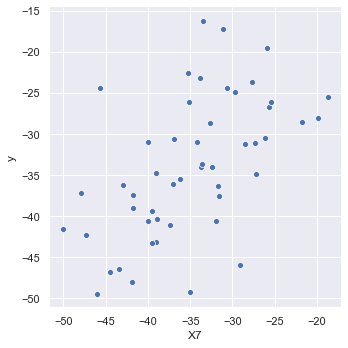

In [8]:
num_ML_models=len(ML_model_list)
z_level_1_learner = pd.DataFrame(y_predictions_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])
y_level_1_learner = y_test_np_array

model_data=z_level_1_learner.copy()
df_y=pd.DataFrame(y_level_1_learner)
df_y.columns=["y"]
model_data["y"]=df_y

display(model_data.head(20))
_ = sns.relplot(x='X7', y='y', data=model_data)


In [9]:
x_train=model_data.drop(["y"],axis=1)

y_tensor = theano.shared(model_data.y.values.astype('float64'))
x_tensor = theano.shared(x_train.values.astype('float64'))
print(x_tensor)


<TensorType(float64, matrix)>


In [10]:
with pm.Model() as model:
    
    # define the priors
    beta1 = pm.Dirichlet('beta1', a=np.array([1]*num_ML_models), shape=num_ML_models)
    sd = pm.HalfNormal('sd', 10)

    # define the likelihood
    mu = pm.math.dot(beta1, x_tensor.T)
    yl = pm.Normal('yl', mu, sd, observed=y_tensor)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '4196' (I am process '3204')


In [11]:
# Generate a MCMC chain
with model:
    hmc_trace = pm.sample(draws=5000, tune=1000, cores=6)
    #trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, beta1]
Sampling 6 chains, 0 divergences: 100%|█████████████████████████████████████| 36000/36000 [00:34<00:00, 1049.88draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.131,0.106,0.000,0.326,0.001,0.000,37343.0,34097.0,28259.0,15257.0,1.0
beta1[1],0.044,0.042,0.000,0.123,0.000,0.000,36268.0,29414.0,26105.0,14853.0,1.0
beta1[2],0.134,0.103,0.000,0.321,0.001,0.000,35390.0,34713.0,25338.0,12974.0,1.0
beta1[3],0.080,0.072,0.000,0.213,0.000,0.000,36279.0,31055.0,26575.0,14726.0,1.0
beta1[4],0.087,0.077,0.000,0.228,0.000,0.000,36893.0,31918.0,26104.0,14398.0,1.0
beta1[5],0.072,0.058,0.000,0.179,0.000,0.000,38504.0,33253.0,29323.0,16019.0,1.0
beta1[6],0.148,0.105,0.000,0.333,0.001,0.000,41439.0,36374.0,34633.0,18331.0,1.0
beta1[7],0.304,0.138,0.047,0.558,0.001,0.001,34961.0,34961.0,33580.0,20448.0,1.0
sd,7.365,0.779,5.981,8.858,0.004,0.003,32974.0,31564.0,34360.0,22015.0,1.0


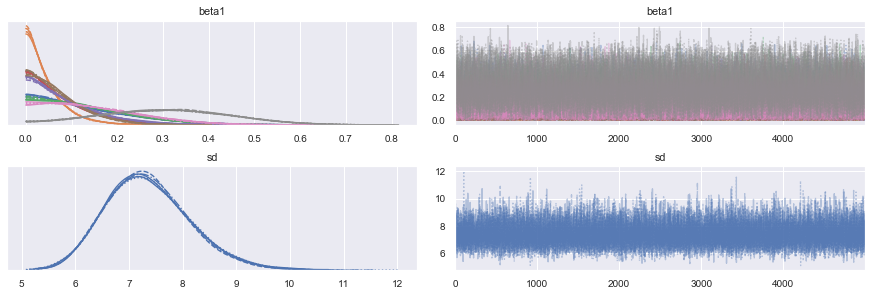

In [12]:
pm.traceplot(hmc_trace)
pm.summary(hmc_trace)

In [13]:
map_tensor_batch = {y_tensor: pm.Minibatch(model_data.y.values.astype('float64'), n_data),
                    x_tensor: pm.Minibatch(x_train.values.astype('float64'), n_data)}
with model:
    advi_fit = pm.fit(method=pm.ADVI(), n=30000,
                      more_replacements=map_tensor_batch)

Average Loss = 174.45: 100%|███████████████████████████████████████████████████| 30000/30000 [00:09<00:00, 3239.41it/s]
Finished [100%]: Average Loss = 174.42


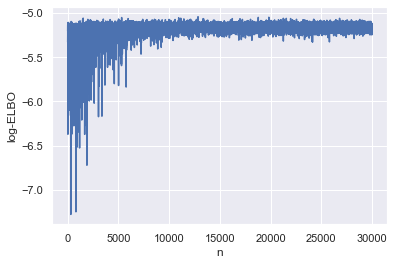

In [14]:
advi_elbo = pd.DataFrame(
    {'log-ELBO': -np.log(advi_fit.hist),
     'n': np.arange(advi_fit.hist.shape[0])})

_ = sns.lineplot(y='log-ELBO', x='n', data=advi_elbo)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.155,0.146,0.001,0.437,0.001,0.001,9870.0,9870.0,9937.0,9877.0,NaN
beta1[1],0.054,0.068,0.000,0.175,0.001,0.000,10138.0,9623.0,9847.0,10004.0,NaN
beta1[2],0.146,0.127,0.002,0.393,0.001,0.001,10102.0,9894.0,10161.0,9806.0,NaN
beta1[3],0.091,0.099,0.000,0.279,0.001,0.001,10120.0,10120.0,10059.0,9716.0,NaN
beta1[4],0.094,0.096,0.001,0.280,0.001,0.001,9658.0,9616.0,9576.0,9473.0,NaN
beta1[5],0.075,0.078,0.000,0.217,0.001,0.001,9619.0,9619.0,9682.0,9238.0,NaN
beta1[6],0.136,0.117,0.001,0.358,0.001,0.001,9803.0,9803.0,9553.0,9370.0,NaN
beta1[7],0.250,0.148,0.013,0.515,0.001,0.001,10059.0,10059.0,10039.0,9450.0,NaN
sd,7.551,0.895,5.912,9.213,0.009,0.006,9902.0,9864.0,9937.0,9600.0,NaN


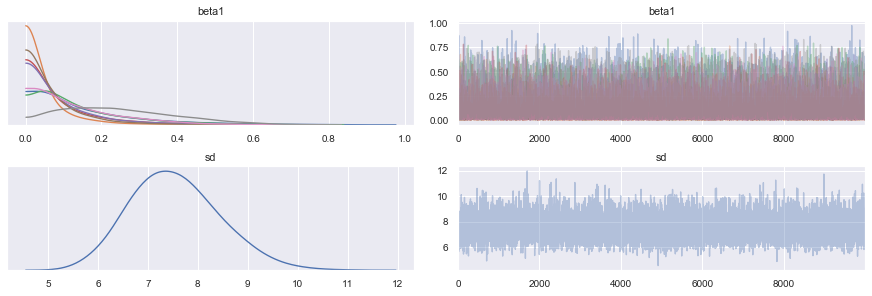

In [15]:
advi_trace = advi_fit.sample(10000)
pm.traceplot(advi_trace)
pm.summary(advi_trace)

### 3.2 Make Predictions from raw x's ( x >>> z >>> y_hat )

In [54]:
np.random.seed(1)
x_new_np_array=np.random.uniform(low=-4.0, high=4.0, size=n_predictors).reshape(1, -1)

def y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    #print(x_new_np_array)
    ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
    y_new_list=[]
    for current_model in ML_model_list:
        y_pred=locals()[current_model].predict(ss1.transform(x_new_np_array))
        y_new_list.append(y_pred[0])
    y_new_nparray=np.array([y_new_list])
    print(y_new_nparray)
    df_y_new=pd.DataFrame(y_new_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])


    #print(df_y_new)
    #y_tensor.set_value(validate_data.y.values)
    x_tensor.set_value(df_y_new.values)
    hmc_posterior_pred = pm.sample_posterior_predictive(hmc_trace, 50, model)
    #print(hmc_posterior_pred['yl'].shape)
    print(np.mean(hmc_posterior_pred['yl']))
    return np.mean(hmc_posterior_pred['yl'])


y_samplings=y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

#hmc_predictions = np.mean(y_samplings)
#hmc_predictions_std = np.std(y_samplings)

print(y_samplings)
#sns.distplot(hmc_posterior_pred['yl'])

 10%|████████                                                                         | 10/100 [00:00<00:00, 99.44it/s]

[[-0.66382396  1.76259595 -3.999085   -1.58133942 -2.82595287 -3.26129124
  -2.50991831 -1.23551418 -0.82586021  0.31053387]]
[[-33.72658798 -37.28890927 -35.57426139 -36.90013929 -31.60482607
  -37.14017605 -37.11797666 -37.61235458]]
          X0         X1         X2         X3         X4         X5  \
0 -33.726588 -37.288909 -35.574261 -36.900139 -31.604826 -37.140176   

          X6         X7  
0 -37.117977 -37.612355  


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 93.89it/s]

(100, 50)
-36.041456124420606


In [58]:
def BOUND(x,lb_x,ub_x):
    for i in range(len(x)):
        x[i,0]=max(min(ub_x[i,0],x[i,0]),lb_x[i,0])
    return x


In [ ]:

def ASA(func_x,lb_x,ub_x,x_0,T0,num_steps,qf, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    N=len(x_0)
    print(N, x_0)
    lk=10*N
    dx=ub_x-lb_x
    #c=2*num_steps**(1.0/N)
    c=2*exp(-qf+0.0/N)
    print ("c",c)
    x_old=x_0
    Tk=T0
    for k in range(num_steps+1)[1:]:
        for i in range(lk+1)[1:]:
            f_old=func_x(x_old.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            u=np.random.rand(N).reshape(N,1)
            y1=np.sign(u-1.0/2)
            y2=Tk
            y3=(1+1.0/Tk)**abs(2*u-1)-1
            y=y1*y2*y3
            x=x_old+y*dx
            x=BOUND(x,lb_x,ub_x)
            f_new=func_x(x.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            if f_new<f_old:
                x_old=x
            elif exp((f_old-f_new-0.0)/np.linalg.norm(Tk,2))>np.random.rand(1)[0]:
                x_old=x
        #print(x_old)
        #Tk=T0*exp(-c*(num_steps+1-k)**qf)
        Tk=T0*exp(-c*k**(qf+0.0/N))
    return x_old,func_x(x_old, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

x_0=np.random.uniform(low=-4.0, high=4.0, size=n_predictors).reshape(n_predictors, -1)

lb_x=np.array([-4]*n_predictors).reshape((n_predictors,1))
ub_x=np.array([4]*n_predictors).reshape((n_predictors,1))
T0=np.array([200]*n_predictors).reshape((n_predictors,1))
num_steps=25

x,f=ASA(y_hat_from_raw_x,lb_x,ub_x,x_0,T0,num_steps,0.90, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

print(x,f)